In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for data visulization
import matplotlib.pyplot as plt
import seaborn as sns

# for modeling estimators
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier as gbm
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
#for data processing
from sklearn.model_selection import train_test_split

#for tuning parameters
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV
from eli5.sklearn import PermutationImportance


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

# Misc.
import os
import time
import gc

['train.csv', 'test.csv']


In [89]:
# Read in data
train = pd.read_csv('../input/train.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [90]:
train.shape

(9557, 143)

In [91]:
test = pd.read_csv('../input/test.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


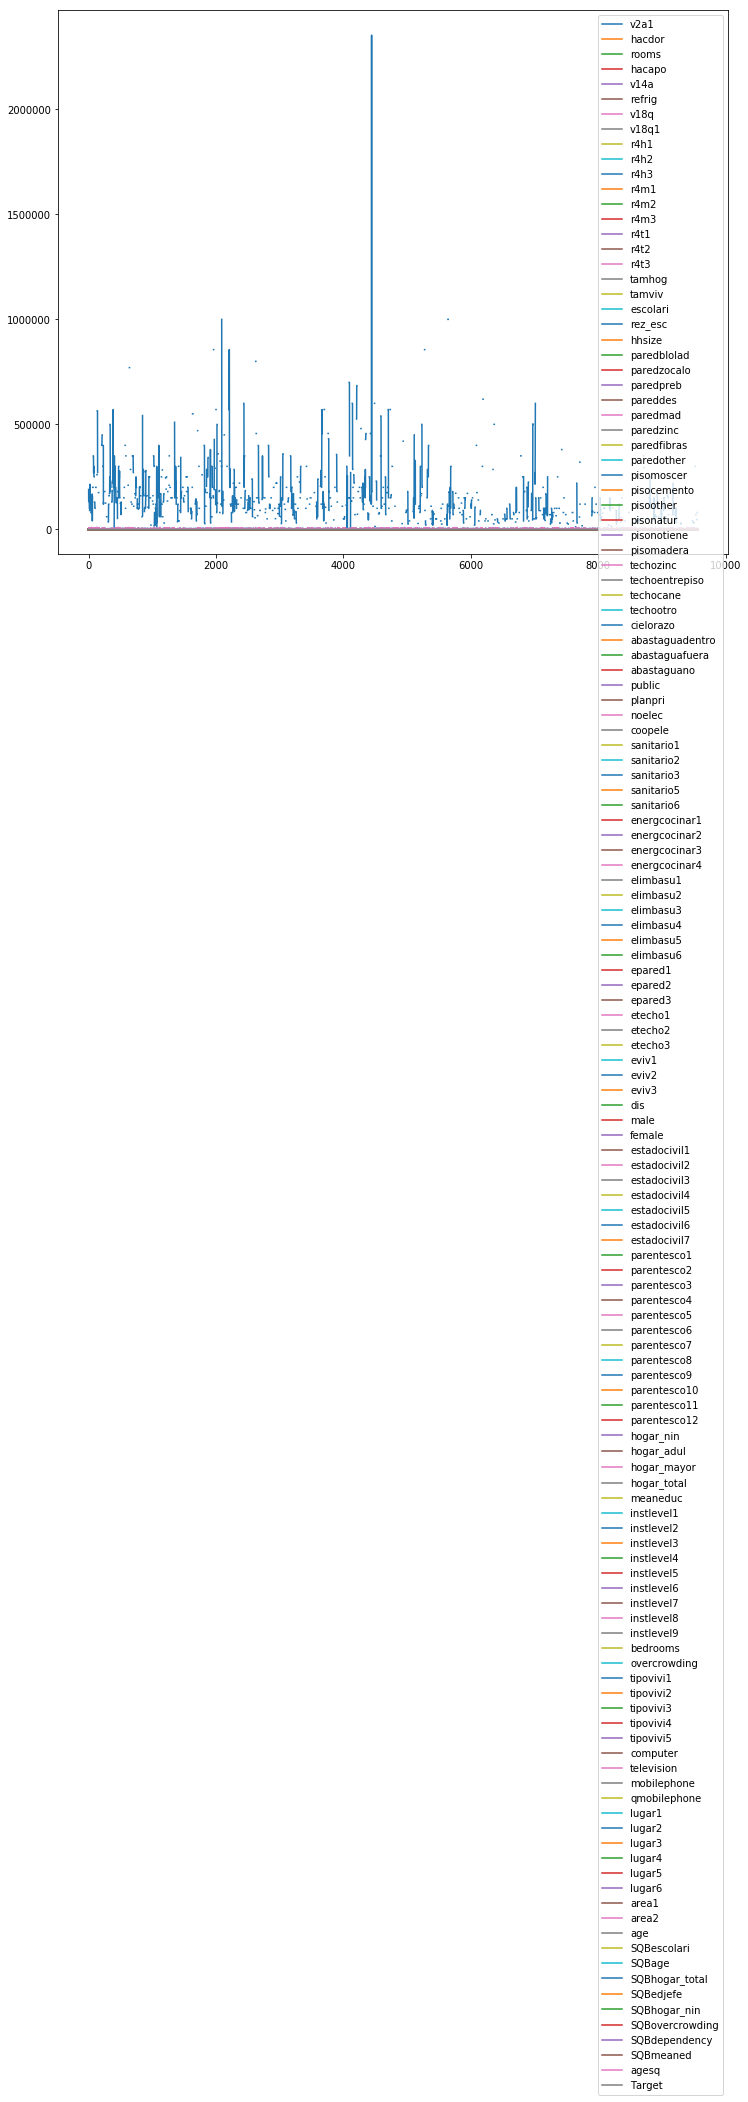

In [92]:
#Perform data visualization
train.plot(figsize = (12,10))

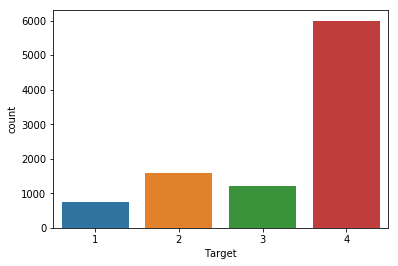

In [93]:
#Count plot
sns.countplot("Target", data=train)

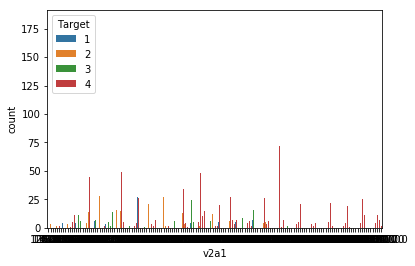

In [94]:
#Count plot
sns.countplot(x="v2a1",hue="Target",data=train)

In [95]:
#Dividing the data into predictors & target
y = train.iloc[:,140]
y.unique()

array([1.0000000e+02, 1.4400000e+02, 1.2100000e+02, 5.2900000e+02,
       9.0250000e+01, 2.8900000e+02, 1.8225000e+02, 1.0677777e+02,
       2.2500000e+02, 4.4444443e+01, 2.7562500e+01, 4.9000000e+01,
       2.4025000e+02, 8.1000000e+01, 1.6900000e+02, 1.9600000e+02,
       2.7225000e+02, 2.0544444e+02, 8.7111107e+01, 4.2250000e+01,
       3.6000000e+01, 6.4000000e+01, 1.6000000e+01, 1.3225000e+02,
       1.6256250e+02, 1.5625000e+02, 3.0250000e+01, 6.0493824e+01,
       5.6250000e+01, 2.0250000e+01, 1.2844444e+02, 3.9062500e+01,
       2.5600000e+02, 3.6100000e+02, 2.5000000e+01, 1.5006250e+02,
       3.2111111e+01, 9.3444450e+01, 4.0000000e+00, 1.1025000e+02,
       1.2995999e+02, 1.3806250e+02, 1.8677779e+02, 6.2500000e+00,
       7.5111115e+01, 6.0062500e+01, 3.2400000e+02, 2.1025000e+02,
       7.2250000e+01, 1.0000000e+00, 3.9510201e+01, 1.0506250e+02,
       1.2250000e+01, 1.8777779e+01, 6.9444443e+01, 2.0164000e+02,
       3.4225000e+02, 4.4100000e+02, 2.1777777e+01, 3.0625000e

In [96]:
X = train.iloc[:,1:141]
X.shape

(9557, 140)

In [97]:

#Label encoding 
train['edjefe'].value_counts()
map2 = {'yes':0,'no':1}
map2
train['edjefe'] = train['edjefe'].replace(map2).astype(np.float32)

In [98]:
test['dependency'] = test['dependency'].map({"yes" : 1, "no" : 0})
test['edjefa'] = test['edjefa'].map({"yes" : 1, "no" : 0})
test['edjefe'] = test['edjefe'].map({"yes" : 1, "no" : 0})

In [99]:
#CLEANING DATA
#     Transform train and test dataframes
#     replacing '0' with NaN
train.replace(0, np.nan)
test.replace(0,np.nan)
#fillna() to replace missing values with the mean value for each column,

train.fillna(train.mean(), inplace=True);
print(train.isnull().sum());

train.shape

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
v14a               0
refrig             0
v18q               0
v18q1              0
r4h1               0
r4h2               0
r4h3               0
r4m1               0
r4m2               0
r4m3               0
r4t1               0
r4t2               0
r4t3               0
tamhog             0
tamviv             0
escolari           0
rez_esc            0
hhsize             0
paredblolad        0
paredzocalo        0
paredpreb          0
pareddes           0
paredmad           0
paredzinc          0
paredfibras        0
                  ..
bedrooms           0
overcrowding       0
tipovivi1          0
tipovivi2          0
tipovivi3          0
tipovivi4          0
tipovivi5          0
computer           0
television         0
mobilephone        0
qmobilephone       0
lugar1             0
lugar2             0
lugar3             0
lugar4             0
lugar5             0
lugar6       

(9557, 143)

In [100]:
test.fillna(test.mean(), inplace=True);
print(test.isnull().sum());

test.shape

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
v14a               0
refrig             0
v18q               0
v18q1              0
r4h1               0
r4h2               0
r4h3               0
r4m1               0
r4m2               0
r4m3               0
r4t1               0
r4t2               0
r4t3               0
tamhog             0
tamviv             0
escolari           0
rez_esc            0
hhsize             0
paredblolad        0
paredzocalo        0
paredpreb          0
pareddes           0
paredmad           0
paredzinc          0
paredfibras        0
                  ..
instlevel9         0
bedrooms           0
overcrowding       0
tipovivi1          0
tipovivi2          0
tipovivi3          0
tipovivi4          0
tipovivi5          0
computer           0
television         0
mobilephone        0
qmobilephone       0
lugar1             0
lugar2             0
lugar3             0
lugar4             0
lugar5       

(23856, 142)

In [101]:
# Summary of target feature
train['Target'].value_counts() 

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [102]:

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size = 0.2)

****

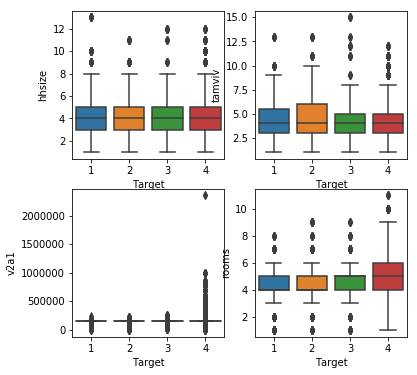

In [111]:
f, axes = plt.subplots(2, 2, figsize=(6, 6))
sns.boxplot(x="Target", y="hhsize", data=train, ax=axes[0, 0])# size of the house hold 
sns.boxplot(x="Target", y="tamviv", data=train, ax=axes[0, 1])# No of people in the household
sns.boxplot(x="Target", y="v2a1", data=train, ax=axes[1, 0])# monthly rent 
sns.boxplot(x="Target", y="rooms", data=train, ax=axes[1, 1])#no of rooms 
plt.show()

In [112]:
y = train.iloc[:,140]
y.unique()

array([4, 2, 3, 1])

> 

In [114]:
X = train.iloc[:,1:141]
X.shape

(9557, 140)

In [115]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    XGBClassifier(
       n_jobs = 2         # No need to tune this parameter value
      ),

    # 2.12 Specify estimator parameters that you would like to change/tune
    {
        'n_estimators': (100, 500),           # Specify integer-values parameters like this
       #'criterion': ['gini'],     # Specify categorical parameters as here
        'max_depth': (4, 100),                # integer valued parameter
       # 'max_features' : (10,64),             # integer-valued parameter
        #'min_weight_fraction_leaf' : (0,0.5, 'uniform')   # Float-valued parameter
    },

    # 2.13
    n_iter=32,            # How many points to sample
    cv = 3                # Number of cross-validation folds
)